**Credit Card Fraud Detection Using Machine Learning**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\Credit Card Fraud Detection Using ML\creditcard.csv\creditcard.csv")
print("Data Info")
print(df)

Data Info
            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ..

**Top 5 Rows**

In [3]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
print(df.shape) #shape of the dataset

(284807, 31)


In [5]:
print("Number of row",df.shape[0])
print("Number of columns",df.shape[1])

Number of row 284807
Number of columns 31


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Feature engineering for null etc..**

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
from sklearn.preprocessing import StandardScaler  # Converting amount range in same range to other columns
sc = StandardScaler()
df["Amount"] = sc.fit_transform(df[["Amount"]])

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [10]:
#drpoping time
df=df.drop(["Time"],axis=1)

In [11]:
df.shape #shape of data now

(284807, 30)

In [12]:
df.duplicated().any() #checking for duplicates values

True

In [13]:
df=df.drop_duplicates() #droping duplicate values

In [14]:
df.shape  #shape after droping duplicates values

(275663, 30)

In [15]:
df["Class"].value_counts()

Class
0    275190
1       473
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

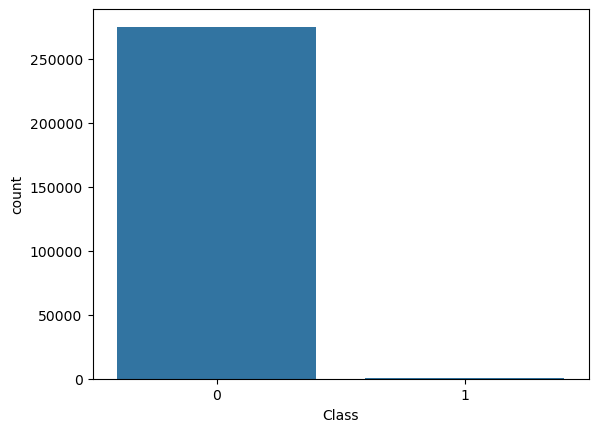

In [16]:
sns.countplot(x="Class", data=df)  # dataset is imbalanced

**Handling imbalnced dataset**
by undersampling and oversampling

In [17]:
#undersampling means random delete rows by majority class to match minority cla
normal=df[df["Class"]==0]  
fraud=df[df["Class"]==1]

print("normal data shape",normal.shape)
print("fraud data shape",fraud.shape)

normal data shape (275190, 30)
fraud data shape (473, 30)


In [18]:
normal_sample=normal.sample(n=473)  #taking 473 data from original data to balnacd the data set
normal_sample.shape

(473, 30)

In [19]:
new_data=pd.concat([normal_sample,fraud],ignore_index=True)
new_data["Class"].value_counts()

Class
0    473
1    473
Name: count, dtype: int64

In [20]:
new_data.head() # new created dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.009264,0.194830,2.737140,-0.275673,-0.096799,2.151921,-0.708065,0.593545,3.304328,-0.819744,...,-0.212129,0.385944,-0.571812,-0.385034,0.719847,0.023317,0.297947,-0.032492,-0.282183,0
1,-0.850310,1.831190,-0.355504,1.029181,1.316915,-0.502079,1.138284,0.233075,-1.300824,-1.263756,...,0.007858,0.005071,-0.572398,0.497883,1.168135,-0.209191,-0.064557,0.013721,-0.330680,0
2,1.829072,-0.221971,-0.294725,0.724768,-0.796212,-1.425110,0.104812,-0.336810,0.793261,-0.240466,...,-0.360321,-0.978104,0.522755,0.890273,-0.557248,-0.910372,0.011363,-0.014137,-0.089596,0
3,0.495647,-1.513370,0.730439,0.546607,-1.530816,-0.241434,-0.136939,-0.061247,1.109997,-0.634859,...,-0.005575,-0.581115,-0.251117,0.495284,0.012562,0.901762,-0.101551,0.079678,1.163485,0
4,-1.213683,-0.538266,2.008803,-1.627878,0.407366,-0.063423,1.352456,-1.040785,1.200075,-0.066288,...,-0.092931,0.645330,-0.426851,0.836186,0.341231,0.739056,-1.008724,-0.628825,0.198507,0


feature matrix addding

In [21]:
x=new_data.drop("Class",axis=1)  #independdent variable 
y=new_data["Class"]              #dependent variable (target variable)

**spliting dataset into training set and test set**

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

**Logistic regression**

In [23]:
from sklearn.linear_model import LogisticRegression
log= LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [24]:
y_pred1=log.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy_score for logisticregresion")
accuracy_score(y_test,y_pred1)

accuracy_score for logisticregresion


0.9436619718309859

In [26]:
print("precision_score for logisticregresion")
precision_score(y_test,y_pred1)

precision_score for logisticregresion


0.9571428571428572

In [27]:
print("recall_score for logisticregresion")
recall_score(y_test,y_pred1)

recall_score for logisticregresion


0.9305555555555556

In [28]:
print("f1_score for logisticregresion")
f1_score(y_test,y_pred1)

f1_score for logisticregresion


0.9436619718309859

**k-nn**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
k=15
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [30]:
y_pred2=knn.predict(x_test)

In [31]:
print("accuracy_score for knn")
accuracy_score(y_test,y_pred2)

accuracy_score for knn


0.9436619718309859

In [32]:
print("precision_score for knn")
precision_score(y_test,y_pred2)

precision_score for knn


1.0

In [33]:
print("recall_score for knn")
recall_score(y_test,y_pred2)

recall_score for knn


0.8888888888888888

In [34]:
print("f1_score for knn")
f1_score(y_test,y_pred2)

f1_score for knn


0.9411764705882353

**SVM**

In [35]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)

SVC()

In [36]:
y_pred3=svm_model.predict(x_test)

In [37]:
print("accuracy_score for svm")
accuracy_score(y_test,y_pred3)

accuracy_score for svm


0.9471830985915493

In [38]:
print("precision_score for svm")
precision_score(y_test,y_pred3)

precision_score for svm


0.9923664122137404

In [39]:
print("recall_score for svm")
recall_score(y_test,y_pred3)

recall_score for svm


0.9027777777777778

In [40]:
print("f1_score for svm")
f1_score(y_test,y_pred3)

f1_score for svm


0.9454545454545454

**Decision Tree**

In [41]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()

In [42]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.3138326226012793, 0.9615384615384616, 'x[13] <= -1.632\ngini = 0.5\nsamples = 662\nvalue = [333, 329]'),
 Text(0.06823027718550106, 0.8846153846153846, 'x[3] <= -1.138\ngini = 0.041\nsamples = 289\nvalue = [6, 283]'),
 Text(0.1910314498933902, 0.9230769230769231, 'True  '),
 Text(0.03411513859275053, 0.8076923076923077, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.1023454157782516, 0.8076923076923077, 'x[11] <= 0.146\ngini = 0.027\nsamples = 287\nvalue = [4, 283]'),
 Text(0.06823027718550106, 0.7307692307692307, 'gini = 0.0\nsamples = 276\nvalue = [0, 276]'),
 Text(0.13646055437100213, 0.7307692307692307, 'x[14] <= -0.016\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.1023454157782516, 0.6538461538461539, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.17057569296375266, 0.6538461538461539, 'x[28] <= 0.537\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.13646055437100213, 0.5769230769230769, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.20469083155

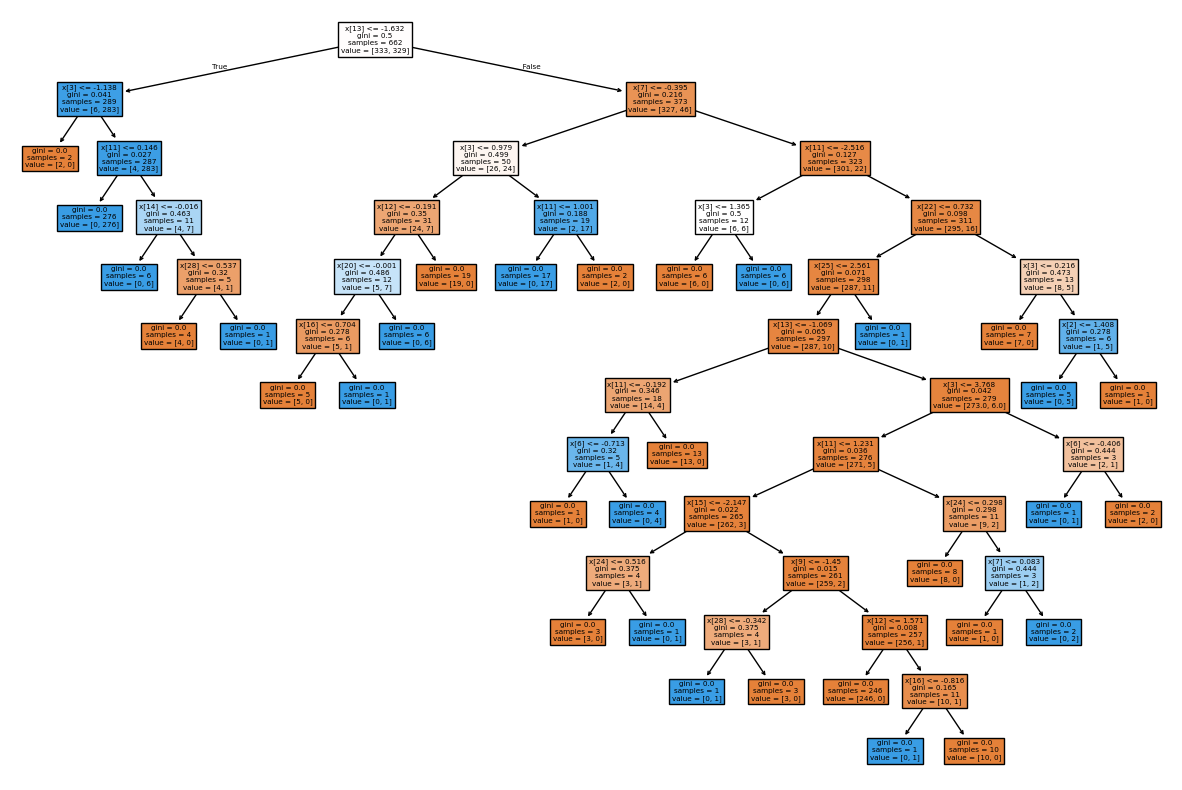

In [43]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(tree_model,filled=True)

In [44]:
y_pred4=tree_model.predict(x_test)

In [45]:
print("accuracy_score for Decision Tree")
accuracy_score(y_test,y_pred4)

accuracy_score for Decision Tree


0.9295774647887324

In [46]:
print("precision_score for Decision Tree")
precision_score(y_test,y_pred4)

precision_score for Decision Tree


0.9246575342465754

In [47]:
print("recall_score for Decision Tree")
recall_score(y_test,y_pred4)

recall_score for Decision Tree


0.9375

In [48]:
print("f1_score for Decision Tree")
f1_score(y_test,y_pred4)

f1_score for Decision Tree


0.9310344827586207

**Table**

In [49]:
data1={"Model":["LogisticRegression","knn","SVM","Decision Tree"],
      "Accuracy":[0.9436619718309859,0.9436619718309859,0.9471830985915493,0.9295774647887324],
      "Precision":[0.9571428571428572,1.0,0.9923664122137404,0.9246575342465754],
      "Recall":[0.9305555555555556,0.8888888888888888,0.9027777777777778,0.9375],
      "F1":[0.9436619718309859,0.9411764705882353,0.9454545454545454,0.9310344827586207]}
data2=pd.DataFrame(data1)
print(data2)

                Model  Accuracy  Precision    Recall        F1
0  LogisticRegression  0.943662   0.957143  0.930556  0.943662
1                 knn  0.943662   1.000000  0.888889  0.941176
2                 SVM  0.947183   0.992366  0.902778  0.945455
3       Decision Tree  0.929577   0.924658  0.937500  0.931034


**Data Visualization**

In [52]:
model=["LogisticRegression","knn","SVM","Decision Tree"]
Accuracy=[0.9436619718309859,0.9436619718309859,0.9471830985915493,0.9295774647887324]
Precision=[0.9571428571428572,1.0,0.9923664122137404,0.9246575342465754]
Recall=[0.9305555555555556,0.8888888888888888,0.9027777777777778,0.9375]
F1=[0.9436619718309859,0.9411764705882353,0.9454545454545454,0.9310344827586207]

<BarContainer object of 4 artists>

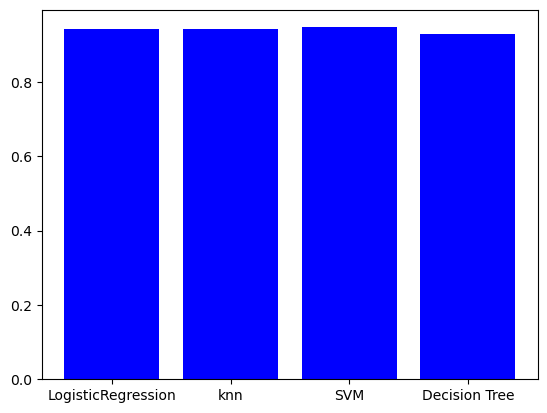

In [64]:
#simple one variable plot
plt.bar(model,Accuracy,color="blue")

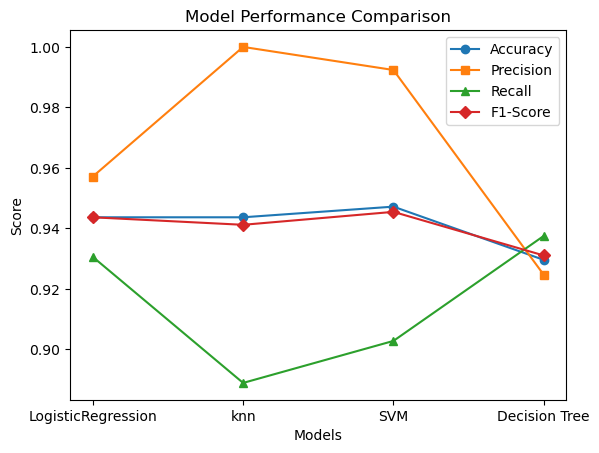

In [58]:
#simple mutli variable plot
plt.plot(model, Accuracy, marker='o', label="Accuracy")
plt.plot(model, Precision, marker='s', label="Precision")
plt.plot(model, Recall, marker='^', label="Recall")
plt.plot(model, F1, marker='D', label="F1-Score")


plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()